#  Padulles Dynamic Model II

### Version 0.9

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>   
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li>
</ol>
</p>

<p style="text-align:justify;">
In this model, Nernst and fuel cell potential were modeled as a function of water, oxygen and hydrogen gases partial pressure that can be calculated from independent variables or constants. The partial pressure of gases is proportional to the molar flow of each gas. 
</p>

<div style="text-align:center;">
    
<img src="images/Padulles2-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-2 Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles2 import Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [3]:
qO2=qO2_Calc(qH2=0.0004,rho=1.168)
qO2

0.0003424657534246576

In [4]:
PH2=PH2_Calc(KH2=0.0004,tH2=3.37,Kr=Kr,I=1,qH2=0.0004)
PH2

0.22881812879247693

In [5]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

2.0968979878594753

In [6]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=0.0004)
PH2O

2.669532068584946

In [7]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.845819522254369

### FC Voltage

$$V_{Fuelcell}=E_{Nernst}-Bln(Ci)-(R^{int}\times i)$$

In [8]:
from opem.Dynamic.Padulles2 import Vcell_Calc
FC_Voltage=Vcell_Calc(Enernst=Enernst, B=0.04777,C=0.0136,I=1,Rint=0.00303)
FC_Voltage

3.0480899579320604

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [9]:
from opem.Dynamic.Padulles2 import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

6.096179915864121

In [10]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

6.20382008413588

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [11]:
from opem.Dynamic.Padulles2 import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.3907807638374436

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=100 with `step`=0.1

In [12]:
Test_Vector = {
    "T": 343,
    "E0": 0.6,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "tH2O": 18.418,
    "B": 0.04777,
    "C": 0.0136,
    "Rint": 0.00303,
    "rho": 1.168,
    "qH2": 0.0004,
    "i-start": 0.1,
    "i-stop": 100,
    "i-step": 0.1,
    "Name": "Padulles2_Test"}


* Notice : "Name", new in version 0.5

In [13]:
from opem.Dynamic.Padulles2 import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-II-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 3.0120122442199793 V
FC Efficiency : 0.4265389961269225 
FC Power : 0.33270041697899955 W
FC Voltage : 3.3270041697899955 V
PH2 : 2.169018669476965 atm
PH2O : 2.669687710942903 atm
PO2 : 2.09696938340326 atm
Power-Thermal : 0.2822995830210005 W
###########
I : 0.2
E : 3.012012104448671 V
FC Efficiency : 0.42225504989786394 
FC Power : 0.6587178778406679 W
FC Voltage : 3.293589389203339 V
PH2 : 2.1690046190953503 atm
PH2O : 2.6696704173475743 atm
PO2 : 2.0969614505650616 atm
Power-Thermal : 0.5712821221593323 W
###########
I : 0.3
E : 3.0120119646768333 V
FC Efficiency : 0.4197329719509197 
FC Power : 0.9821751543651522 W
FC Voltage : 3.273917181217174 V
PH2 : 2.1689905687137356 atm
PH2O : 2.669653123752246 atm
PO2 : 2.0969535177268637 atm
Power-Thermal : 0.8628248456348478 W
###########
I : 0.4
E : 3.0120118249044676 V
FC Efficiency : 0.41793223959535725 
FC Power : 1.3039485875375147 W
FC Voltage : 3.2598

FC Power : 71.8258470727632 W
FC Voltage : 2.9927436280318 V
PH2 : 2.1656606282711257 atm
PH2O : 2.665554541659381 atm
PO2 : 2.095073435073865 atm
Power-Thermal : 75.77415292723681 W
###########
I : 24.1
E : 3.0119786839320346 V
FC Efficiency : 0.3836207512806669 
FC Power : 72.11302882573979 W
FC Voltage : 2.9922418599892024 V
PH2 : 2.1656465778895115 atm
PH2O : 2.6655372480640525 atm
PO2 : 2.095065502235667 atm
Power-Thermal : 76.10197117426023 W
###########
I : 24.2
E : 3.0119785440337092 V
FC Efficiency : 0.3835565274904129 
FC Power : 72.40013012909034 W
FC Voltage : 2.991740914425221 V
PH2 : 2.1656325275078974 atm
PH2O : 2.6655199544687243 atm
PO2 : 2.0950575693974685 atm
Power-Thermal : 76.42986987090966 W
###########
I : 24.3
E : 3.011978404134854 V
FC Efficiency : 0.38349240827647335 
FC Power : 72.68715106472277 W
FC Voltage : 2.9912407845564926 V
PH2 : 2.1656184771262827 atm
PH2O : 2.6655026608733956 atm
PO2 : 2.09504963655927 atm
Power-Thermal : 76.75784893527724 W
########

FC Power : 127.73906334593849 W
FC Voltage : 2.903160530589511 V
PH2 : 2.162850551948248 atm
PH2O : 2.6620958225936726 atm
PO2 : 2.0934868674342044 atm
Power-Thermal : 142.86093665406153 W
###########
I : 44.1
E : 3.0119506937202765 V
FC Efficiency : 0.37214730071669194 
FC Power : 128.0112285005277 W
FC Voltage : 2.902748945590197 V
PH2 : 2.162836501566634 atm
PH2O : 2.662078528998344 atm
PO2 : 2.093478934596006 atm
Power-Thermal : 143.20377149947234 W
###########
I : 44.2
E : 3.0119505537159275 V
FC Efficiency : 0.37209456489988363 
FC Power : 128.28332219488388 W
FC Voltage : 2.9023376062190924 V
PH2 : 2.1628224511850194 atm
PH2O : 2.6620612354030153 atm
PO2 : 2.0934710017578078 atm
Power-Thermal : 143.54667780511613 W
###########
I : 44.3
E : 3.011950413711048 V
FC Efficiency : 0.3720418604315396 
FC Power : 128.55534445351418 W
FC Voltage : 2.9019265113660087 V
PH2 : 2.162808400803405 atm
PH2O : 2.6620439418076867 atm
PO2 : 2.0934630689196094 atm
Power-Thermal : 143.8896555464858 

FC Efficiency : 0.3621324888696624 
FC Power : 180.77653844373546 W
FC Voltage : 2.8246334131833666 V
PH2 : 2.1600404756253706 atm
PH2O : 2.6586371035279637 atm
PO2 : 2.0919002997945437 atm
Power-Thermal : 212.82346155626456 W
###########
I : 64.1
E : 3.0119226822877643 V
FC Efficiency : 0.3620840629103436 
FC Power : 181.03478977391362 W
FC Voltage : 2.8242556907006806 V
PH2 : 2.160026425243756 atm
PH2O : 2.658619809932635 atm
PO2 : 2.0918923669563454 atm
Power-Thermal : 213.1802102260864 W
###########
I : 64.2
E : 3.0119225421772304 V
FC Efficiency : 0.3620356518564073 
FC Power : 181.29297302361456 W
FC Voltage : 2.8238780844799773 V
PH2 : 2.160012374862142 atm
PH2O : 2.658602516337307 atm
PO2 : 2.091884434118147 atm
Power-Thermal : 213.53702697638548 W
###########
I : 64.3
E : 3.0119224020661655 V
FC Efficiency : 0.36198725566145523 
FC Power : 181.55108820444627 W
FC Voltage : 2.823500594159351 V
PH2 : 2.1599983244805276 atm
PH2O : 2.658585222741978 atm
PO2 : 2.0918765012799487 at

FC Efficiency : 0.35269424448917813 
FC Power : 231.08526898930955 W
FC Voltage : 2.75101510701559 V
PH2 : 2.157230399302493 atm
PH2O : 2.655178384462255 atm
PO2 : 2.0903137321548826 atm
Power-Thermal : 285.51473101069047 W
###########
I : 84.1
E : 3.0118946496022962 V
FC Efficiency : 0.3526480937917186 
FC Power : 231.33009656549157 W
FC Voltage : 2.7506551315754053 V
PH2 : 2.1572163489208784 atm
PH2O : 2.6551610908669265 atm
PO2 : 2.0903057993166847 atm
Power-Thermal : 285.88490343450843 W
###########
I : 84.2
E : 3.0118945093854164 V
FC Efficiency : 0.35260195175321496 
FC Power : 231.57485783344148 W
FC Voltage : 2.750295223675077 V
PH2 : 2.1572022985392643 atm
PH2O : 2.655143797271598 atm
PO2 : 2.0902978664784864 atm
Power-Thermal : 286.2551421665585 W
###########
I : 84.3
E : 3.011894369168005 V
FC Efficiency : 0.35255581835311195 
FC Power : 231.8195527999052 W
FC Voltage : 2.749935383154273 V
PH2 : 2.1571882481576496 atm
PH2O : 2.6551265036762692 atm
PO2 : 2.090289933640288 atm

Done!


* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [14]:
Data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-II-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [15]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-II Simulation Failed!(Check Your Inputs)',
 'Status': False}

## Plot

In [16]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

In [17]:
def plot_func(x,y,x_label,y_label,color='green'):
    plt.figure()
    plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


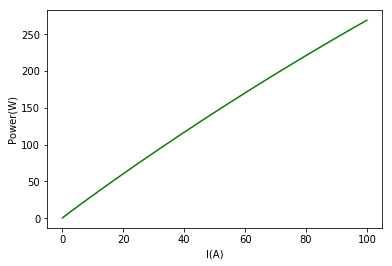

In [18]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

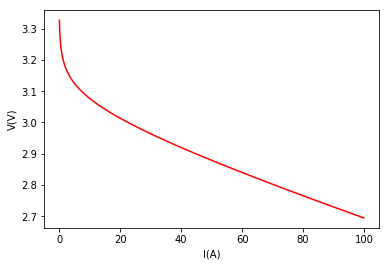

In [19]:
plot_func(data["I"],data["V"],"I(A)","V(V)","red")

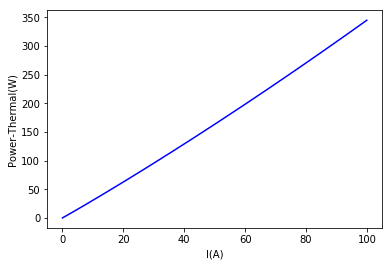

In [20]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

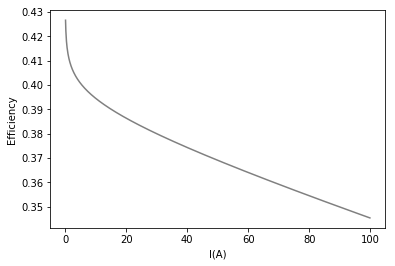

In [21]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

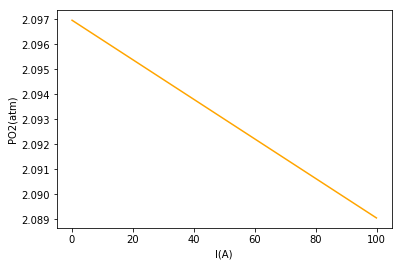

In [22]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

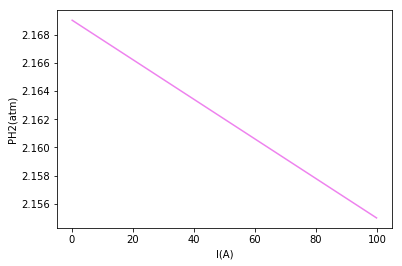

In [23]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

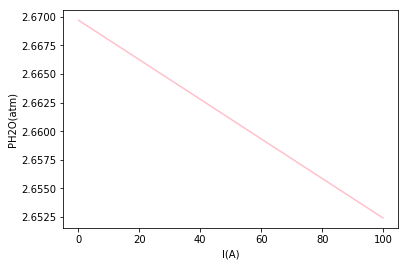

In [24]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Padulles-II/Padulles2_Test.html">HTML File</a>

<a href="Padulles-II/Padulles2_Test.opem">OPEM File</a>

<a href="Padulles-II/Padulles2_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User Input
2. System : Simulator Calculation (Middle Value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Activation voltage constant</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$C$$</td>
        <td style="text-align:center;">Activation constant parameter</td>
        <td>$$A^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">FuelCell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher Heating Value Potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical Potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* Notice : $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>